In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[2:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop([2],axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
data=data.pct_change()*100
data=data.dropna()
data

C:\Users\Bora\AppData\Local\Temp\ipykernel_12800\4048180366.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_12800\4048180366.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.pct_change()*100


2,Alkolsüz içecekler,Alkollü içecekler,Tütün,Giyim,Ayakkabı,Gerçek kira,Konutun bakım ve onarımı,Su (Şebeke suyu) ve konutla ilgili çeşitli hizmetler,"Elektrik, gaz ve diğer yakıtlar","Mobilya, mefruşat, halı ve diğer yer döşemeleri",...,"Kişisel bakımda kullanılan diğer aletler, ürünler ve eşyalar","Mücevheratlar, saat ve kol saatleri",Seyahat malzemeleri ve diğer kişisel aksesuarlar,Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar,Sosyal hizmetler,Konut sigortası,Sağlık sigortası,Ulaştırma sigortası,Başka yerde sınıflandırılmayan diğer mali hizmetler,Başka yerde sınıflandırılmayan diğer hizmetler
2019-02-28,0.215632,1.248206,0.000000,-5.764947,-1.724402,0.568393,0.118605,-1.849977,0.081969,0.249993,...,-1.415153,-0.085449,-1.457363,-1.266122,0.939979,0.700568,1.133086,0.912931,2.250858,0.032031
2019-03-31,0.103599,0.093428,0.000000,0.094554,1.595145,0.542574,-0.043285,-0.147776,0.269795,0.374055,...,-0.454460,2.218675,-0.209819,-0.163012,0.869901,0.391112,1.291530,1.653665,0.000000,0.032021
2019-04-30,0.453773,0.031114,7.446809,5.592292,4.649025,0.609145,0.549275,0.388138,0.098498,5.827550,...,1.829287,3.715538,0.969645,-0.374450,0.808358,0.155146,2.252760,0.782752,0.000000,0.905195
2019-05-31,1.312905,0.082586,9.695378,4.522276,2.755517,0.796440,1.364553,-1.527079,0.328805,-4.639057,...,-0.111310,4.808586,0.553961,1.027053,0.817512,-0.041308,0.293016,0.947203,0.000000,0.058160
2019-06-30,1.358469,0.345075,0.015860,-1.604827,-1.445869,0.856665,0.798318,-2.081803,0.248786,0.005352,...,3.401845,1.644896,-0.377996,0.471535,0.992556,0.327158,0.002197,0.478357,0.000000,0.033467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,1.498605,-0.169192,0.000000,3.088166,1.086904,6.326011,3.361014,1.526593,1.129623,5.029055,...,2.508812,10.365653,4.588040,-1.673706,1.020138,3.444980,3.963836,4.226767,0.000000,0.304056
2024-04-30,1.244642,-0.388365,10.527401,4.298984,5.570999,4.614045,2.948168,1.149774,-2.420603,6.554737,...,2.826861,2.906018,3.207756,5.058530,0.753640,3.125718,3.241202,5.743797,0.000000,5.987377
2024-05-31,3.871560,3.324942,4.869510,10.099690,7.851208,5.464579,2.696799,-0.227567,12.772636,1.763901,...,1.976490,-0.948301,-0.718445,1.764809,2.751220,3.530703,6.607145,3.567295,0.000000,0.152519
2024-06-30,2.055742,0.921053,0.000000,-0.425815,-1.118330,5.094167,1.139858,12.691136,0.502324,1.279127,...,1.999136,0.467939,-0.006742,4.920143,2.324070,2.867590,-7.704407,-1.880345,0.000000,0.147834


In [4]:
ağırlık=pd.read_excel("ağırlık.xlsx")
ağırlık

,Unnamed: 0,Ağırlık
0,Alkolsüz içecekler ve konsantre içecekler,0.342840
1,Ayakkabı onarımı ve kiralanması,0.008916
2,Bayanlar için kuaför ve benzeri hizmetler,0.337027
3,Başka yerde sınıflandırılamayan diğer gıda ürü...,0.369732
4,Başka yerde sınıflandırılmamış diğer kişisel a...,0.160269
...,...,...
136,Şarap,0.025199
137,Şarküteri ürünleri ve diğer et çeşitleri,0.678130
138,Şehir gazı ve doğalgaz,2.572441
139,Şeker,0.376916


In [5]:
data=data[ağırlık["Unnamed: 0"]]
data = data.loc[:,~data.columns.duplicated()].copy()

In [6]:
import os
from statsmodels.tsa.x13 import x13_arima_analysis
datasa=pd.DataFrame()
for col in data.columns:
    path=os.chdir(r'C:\Users\Bora\Desktop\x13as')
    #X13 ARIMA modülünü indirip bilgisayarınızdaki dosya yolunu vermeniz gerekmekte.
    try:
        ayrıs=x13_arima_analysis(data[col],x12path=path)
        datasa[col]=ayrıs.seasadj
    except:
        pass

c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\statsmodels\tsa\x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\statsmodels\tsa\x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)
c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\site-packages\statsmodels\tsa\x13.py:192: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)
c:\Users\Bora\Documents\GitHub\InflationForecast\.venv\lib\si

In [39]:
import numpy as np

def calculate_satrim(percentage):
    satrim=[]
    for row in datasa.index:
        ay=datasa.loc[row]
        ay=ay.sort_values(ascending=False).iloc[int(len(datasa.columns)*percentage):int(-len(datasa.columns)*percentage)]
        ay=ay.sort_index()
        ağırlıklar=ağırlık[ağırlık["Unnamed: 0"].isin(ay.index.values)]
        ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
        satrim.append(np.sum(ay.values*ağırlıklar["Ağırlık"])/100)
    return satrim


In [43]:
satrims=pd.DataFrame()
satrims["SATRIM%5"]=calculate_satrim(0.05)
satrims["SATRIM%10"]=calculate_satrim(0.1)
satrims["SATRIM%15"]=calculate_satrim(0.15)
satrims["SATRIM%20"]=calculate_satrim(0.20)
satrims=satrims.set_index(pd.to_datetime(data.index))
satrims

C:\Users\Bora\AppData\Local\Temp\ipykernel_12800\1997661282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
C:\Users\Bora\AppData\Local\Temp\ipykernel_12800\1997661282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ağırlıklar["Ağırlık"]=100*(ağırlıklar["Ağırlık"]/ağırlıklar["Ağırlık"].sum())
C:\Users\Bora\AppData\Local\Temp\ipykernel_12800\1997661282.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,SATRIM%5,SATRIM%10,SATRIM%15,SATRIM%20
2019-02-28,0.529411,0.666537,0.632374,0.680616
2019-03-31,0.492168,0.503721,0.600841,0.642482
2019-04-30,1.048261,1.043518,0.966941,0.994805
2019-05-31,1.268384,1.401429,1.296477,1.211091
2019-06-30,0.830093,0.965213,1.014220,1.076652
...,...,...,...,...
2024-03-31,3.266492,3.186048,3.237435,3.231909
2024-04-30,3.245661,3.015582,2.934331,3.191231
2024-05-31,3.564309,3.327205,3.188691,3.558868
2024-06-30,1.904706,2.306762,2.238457,2.114779


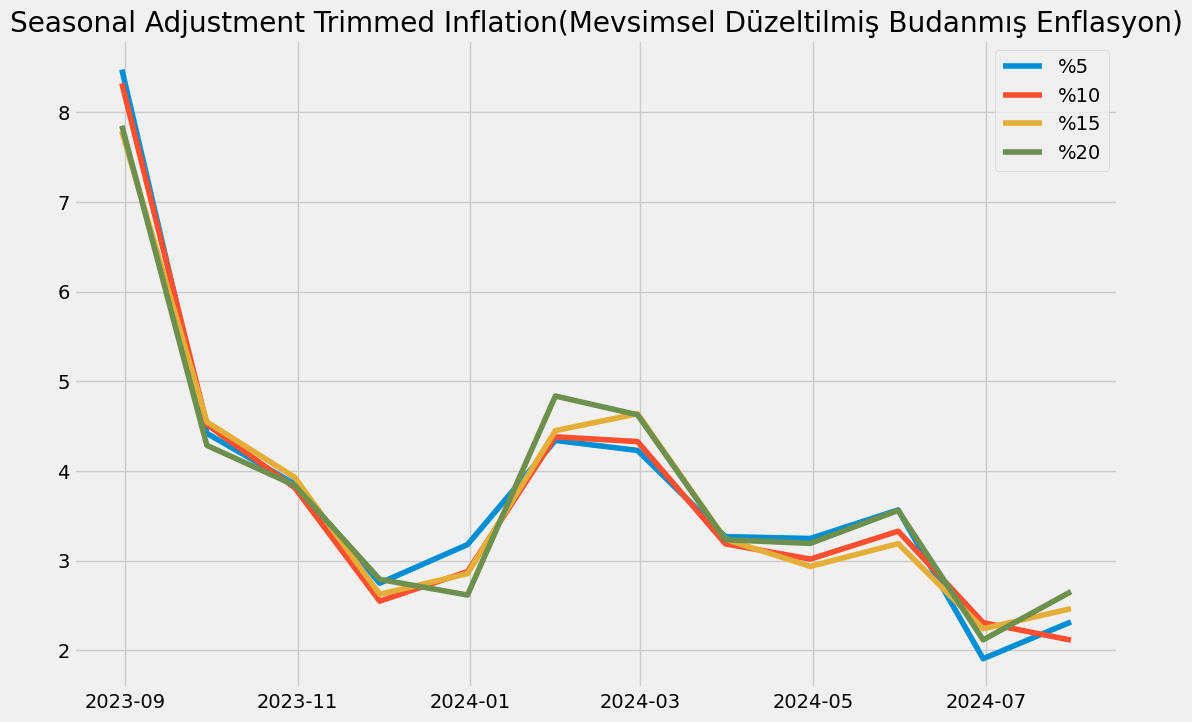

In [44]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Seasonal Adjustment Trimmed Inflation(Mevsimsel Düzeltilmiş Budanmış Enflasyon)")
plt.plot(satrims["SATRIM%5"].tail(12),label="%5")
plt.plot(satrims["SATRIM%10"].tail(12),label="%10")
plt.plot(satrims["SATRIM%15"].tail(12),label="%15")
plt.plot(satrims["SATRIM%20"].tail(12),label="%20")
plt.legend()

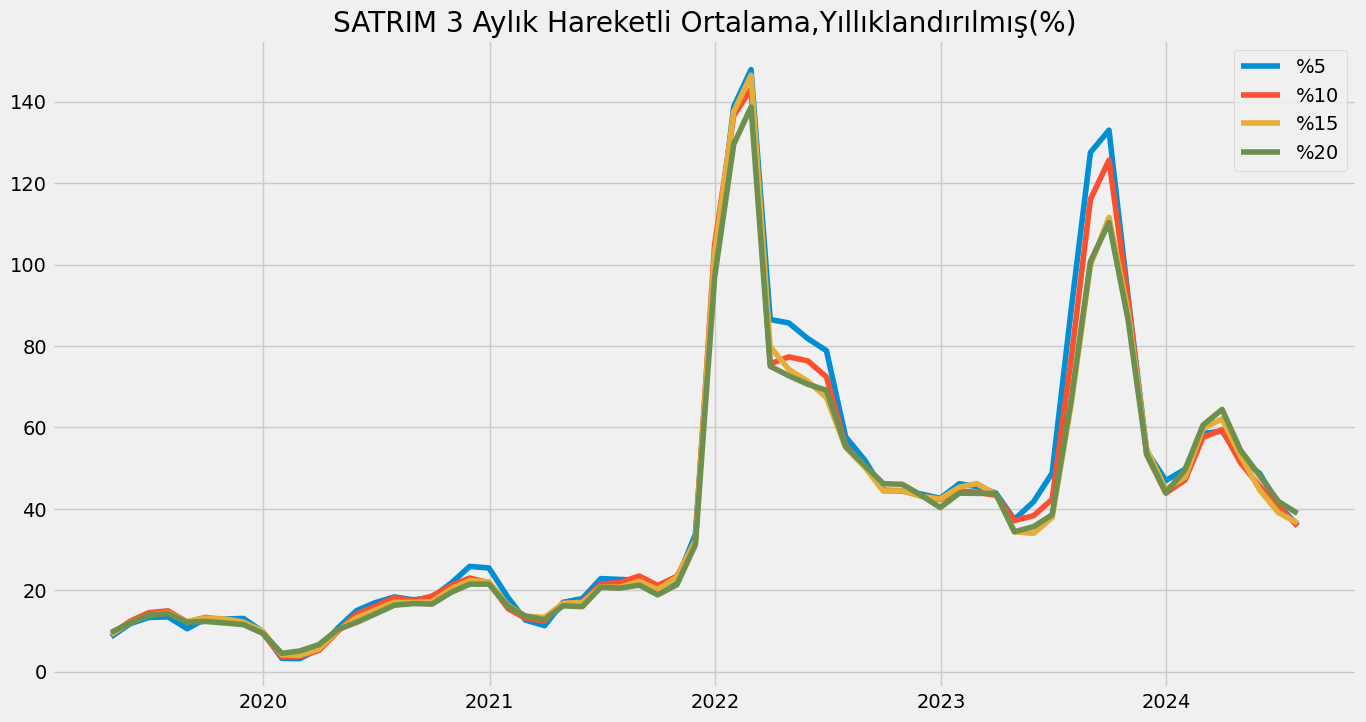

In [48]:
plt.figure(figsize=(15,8))
plt.title("SATRIM 3 Aylık Hareketli Ortalama,Yıllıklandırılmış(%)")
plt.plot((((1+(satrims["SATRIM%5"].rolling(3).mean()/100))**12)-1)*100,label="%5")
plt.plot((((1+(satrims["SATRIM%10"].rolling(3).mean()/100))**12)-1)*100,label="%10")
plt.plot((((1+(satrims["SATRIM%15"].rolling(3).mean()/100))**12)-1)*100,label="%15")
plt.plot((((1+(satrims["SATRIM%20"].rolling(3).mean()/100))**12)-1)*100,label="%20")
plt.legend()